# this notebook represents mid-term forecasting(1year) with daily resolution using ML models

refs:


1.   https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424
2.   (sklearn)https://towardsdatascience.com/time-series-modeling-using-scikit-pandas-and-numpy-682e3b8db8d1
3.   https://towardsdatascience.com/sktime-a-unified-python-library-for-time-series-machine-learning-3c103c139a55
4.   https://stackoverflow.com/questions/63517126/any-way-to-predict-monthly-time-series-with-scikit-learn-in-python
5.   https://paperswithcode.com/paper/forecasting-foreign-exchange-rate-a
6. https://github.com/alan-turing-institute/sktime/blob/main/examples/01_forecasting.ipynb
7. https://arxiv.org/pdf/2005.08067.pdf (sktime paper-metrics p9)








fine tuning RF : 

*   https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
*   xgboost: https://machinelearningmastery.com/xgboost-for-time-series-forecasting/
* to read: https://towardsdatascience.com/random-forest-hyperparameters-and-how-to-fine-tune-them-17aee785ee0d 



Regarding a machine learning paper, consider starting by reviewing papers related to your work (Google Scholar may help) and write a section about it (keep in mind how your work relates to them and what innovation it brings to the field, and write about it). Then write sections for describing your dataset(s), for describing your algorithms and methodology, and why you have selected them. Also, don’t forget to write about your results (you will see how a machine learning paper is organized by reviewing other papers anyway).

At the end, get ready to answer the reviews you will receive some time after submitting.

It would be easier if you already have academic experience on researching or if you have a professor or experienced researcher to advise you with that. Also, at least talk to someone with academic experience to advise you WHERE you should submit your paper, given your work subject.

In summary: yes, you can! But it will be a lot easier if you have an advisor, at least…




One also needs to choose the journal which is most suited to the subject field of the article. Is the article a review article or a piece of original investigation? Does the study provide incremental gains in knowledge or is there something exceptionally novel to report? Journals and fields will vary in what they consider appropriate and which formats they publish.

Depending on the journal, choosing an appropriate editor(s) is the final step. There may be a list of editors and reviewers to choose from and it makes sense to choose someone who works in a closely related field.

The stages of publishing research may differ by field and publisher, but broadly you'll follow these steps:

Do the research
Decide what research results you want to publish together as an account of your research findings. This should be decided independently of the direction of the results, i.e. whether or not you got the results you wanted.
Discuss authorship with those who contributed to the research
Draft the text, tables and figures and work with all the authors on revising and editing the paper. Anyone involved in this process who is not an author should be acknowledged.
Optionally, get feedback from colleagues about the manuscript
Optionally, get the paper edited by a language editing service
Get approval from all the authors of the version to be submitted
Agree among the authors where you will submit and how any page charges or article processing charges will be paid
Have the underlying data and any code ready to share on request or ideally deposit this publicly. Also have documentation such as of ethics approval ready.
Prepare a cover letter and the manuscript files
Read the instructions for authors of the target journal, check you comply with their policies
Submit the article via the online submission
The article will undergo different initials checks / triage depending on the journal, such as scope or issues like reporting.
If the paper is not rejected, it will be assigned to an editor, either a staff editor or an academic editor. In some journals, the Editor-in-Chief decides this allocation.
The editor will decide if the paper is suitable for peer review. If not, they may reject the paper (often called a “desk reject”) or ask for revisions. Some journals discuss decisions or require approval by the EiC or a section editor, others give individual editors autonomy in their decisions.
Most journals require peer review before a paper can be accepted, though some rely on editorial review. Peer reviewers are experts in the topic and/or methods of the research. They may be selected from a database of reviewers, researchers the editors knows of themselves, or chosen based on their publication record.
Potential reviewers are asked to review, usually by email but occasionally by phone. If they agree, they will be sent the paper and given anything from a few days to several weeks to submit their review. The number of reviewers is usually two or three, but can vary. If reviewers decline, they may suggest alternatives. Publishing staff often support editors in this process.
Reviewers will usually send their comments via the online system or email. They might be asked to answer specific questions and are often asked about their recommendation (accept/revise/reject).
Once the editor has enough reviews, they will make their decision based on the reviews, the journal guidelines, and their own assessment of the paper and the reviewers' expertise. The editor may be able to overrule the reviewers. Their decision might need to be approved or discussed. They will send their decision, usually by email, to the authors.
If the article needs revisions, the authors will be asked to resubmit by a certain date. That deadline can often be extended. Authors might need to do more research, a reanalysis, or revise the language.
If the article is rejected, the authors might appeal the decision or be allowed to resubmit to the same journal if they address all the editor and reviewer concerns. Otherwise, go back to step 10 at the next journal of the authors' choice.
If revised, editor might make the next decision themselves or send the paper for re-review
Once accepted, the paper might be posted publicly as an “in press” version or this might wait until production is complete
During production, typesetting, formatting, copyediting and other checks will be performed by the publisher
The final article is then formally published, usually as HTML and/or PDF, and sent to indexing services

In [ ]:
#ref 1
#make zoom on pred vs test data
#make cross-correlation between pred-test data
#dont be overconfident with traditional accuracy metrics : r2, mae,...
#ref2
#A better alternative for cross validation on time series data (than K-fold CV) is 
#Forward Chaining strategy.

#sktime tuto github [6]
#1.2.1, 1.2.2, 1.3, 1.4.1, 3.3(tuning), 3.4 (ensembling)
#LSTM can overcome the problem of back-propagated error decay through memory blocks of LSTM. In 
#contrast, MLP) models very often face the problem ofoverfitting, backpropagated error decay, 
#and it cannot automatically determine the optimal time lags while fitting time-series data[5]

#ML mastery: xgboost, Random Forest

In [ ]:

from numpy import argsort
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy import concatenate
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
import sklearn
from sklearn import metrics
import numpy as np
import matplotlib.dates as mdates

In [ ]:
#read multivariate data
df=pd.read_csv('/content/clean_daily_df_human_logic.csv')
df.time=pd.to_datetime(df.time,dayfirst=True)
df.columns

Index(['time', 'MIN_TEMPERATURE_C_t_365', 'clients_per_day_t_365',
       'Holiday_Food_Related_t_365', 'consommation_t_365',
       'pdl_total_daily_load_t_365', 'max_pdl_daily_load_t_365',
       'weekend_t_365', 'MIN_TEMPERATURE_C_t_354', 'clients_per_day_t_354',
       'Holiday_Food_Related_t_354', 'consommation_t_354',
       'pdl_total_daily_load_t_354', 'max_pdl_daily_load_t_354',
       'weekend_t_354', 'MIN_TEMPERATURE_C_t', 'clients_per_day_t',
       'Holiday_Food_Related_t', 'weekend_t', 'max_pdl_daily_load_t'],
      dtype='object')

In [ ]:
df.head()

,time,MIN_TEMPERATURE_C_t_365,clients_per_day_t_365,Holiday_Food_Related_t_365,consommation_t_365,pdl_total_daily_load_t_365,max_pdl_daily_load_t_365,weekend_t_365,MIN_TEMPERATURE_C_t_354,clients_per_day_t_354,Holiday_Food_Related_t_354,consommation_t_354,pdl_total_daily_load_t_354,max_pdl_daily_load_t_354,weekend_t_354,MIN_TEMPERATURE_C_t,clients_per_day_t,Holiday_Food_Related_t,weekend_t,max_pdl_daily_load_t
0,2016-01-01,8,3970,1,7068.81,16580,1433.0,0,14,3979,0,7217.96,18556,1205.0,0,15,4242,1,0,996.0
1,2016-01-02,12,3970,0,7074.65,22006,1439.0,0,13,3979,0,8503.31,18495,1370.0,0,15,4244,0,1,999.0
2,2016-01-03,12,3970,1,7074.65,18629,1127.0,1,16,3979,0,8482.42,16373,1092.0,0,16,4244,0,1,1060.0
3,2016-01-04,15,3971,0,7075.31,18060,1099.0,1,17,3979,0,8482.42,18999,1334.0,0,14,4246,0,0,1182.0
4,2016-01-05,15,3971,0,7083.30,20122,1288.0,0,16,3979,0,8482.42,18749,1320.0,0,18,4246,0,0,1023.0


In [ ]:
data=pd.read_csv('/content/clean_daily_df_human_logic.csv',index_col='time')[['MIN_TEMPERATURE_C_t_365',
        'clients_per_day_t_365','Holiday_Food_Related_t_365', 'consommation_t_365',
       'pdl_total_daily_load_t_365', 'max_pdl_daily_load_t_365',
       'weekend_t_365',
       
        'MIN_TEMPERATURE_C_t_354', 'clients_per_day_t_354',
       'Holiday_Food_Related_t_354', 'consommation_t_354',
       'pdl_total_daily_load_t_354', 'max_pdl_daily_load_t_354',
       'weekend_t_354',
       
        'MIN_TEMPERATURE_C_t', 'clients_per_day_t',
       'Holiday_Food_Related_t','weekend_t', 'max_pdl_daily_load_t']].dropna()


In [ ]:
data.shape#without time

(1674, 19)

In [ ]:
data.index=pd.to_datetime(data.index,dayfirst=True)

In [ ]:
data.head()

,MIN_TEMPERATURE_C_t_365,clients_per_day_t_365,Holiday_Food_Related_t_365,consommation_t_365,pdl_total_daily_load_t_365,max_pdl_daily_load_t_365,weekend_t_365,MIN_TEMPERATURE_C_t_354,clients_per_day_t_354,Holiday_Food_Related_t_354,consommation_t_354,pdl_total_daily_load_t_354,max_pdl_daily_load_t_354,weekend_t_354,MIN_TEMPERATURE_C_t,clients_per_day_t,Holiday_Food_Related_t,weekend_t,max_pdl_daily_load_t
time,,,,,,,,,,,,,,,,,,,
2016-01-01,8,3970,1,7068.81,16580,1433.0,0,14,3979,0,7217.96,18556,1205.0,0,15,4242,1,0,996.0
2016-01-02,12,3970,0,7074.65,22006,1439.0,0,13,3979,0,8503.31,18495,1370.0,0,15,4244,0,1,999.0
2016-01-03,12,3970,1,7074.65,18629,1127.0,1,16,3979,0,8482.42,16373,1092.0,0,16,4244,0,1,1060.0
2016-01-04,15,3971,0,7075.31,18060,1099.0,1,17,3979,0,8482.42,18999,1334.0,0,14,4246,0,0,1182.0
2016-01-05,15,3971,0,7083.30,20122,1288.0,0,16,3979,0,8482.42,18749,1320.0,0,18,4246,0,0,1023.0


In [ ]:
data.tail()

,MIN_TEMPERATURE_C_t_365,clients_per_day_t_365,Holiday_Food_Related_t_365,consommation_t_365,pdl_total_daily_load_t_365,max_pdl_daily_load_t_365,weekend_t_365,MIN_TEMPERATURE_C_t_354,clients_per_day_t_354,Holiday_Food_Related_t_354,consommation_t_354,pdl_total_daily_load_t_354,max_pdl_daily_load_t_354,weekend_t_354,MIN_TEMPERATURE_C_t,clients_per_day_t,Holiday_Food_Related_t,weekend_t,max_pdl_daily_load_t
time,,,,,,,,,,,,,,,,,,,
2020-07-27,29,5287,0,6697.78,7111,736.0,1,30,5304,0,9005.37,9467,927.0,0,28,5189,0,0,1010.0
2020-07-28,27,5287,0,6697.78,9459,905.0,0,29,5303,0,9005.37,8211,867.0,0,28,5189,0,0,986.0
2020-07-29,28,5284,0,6476.49,9865,964.0,0,29,5303,0,9005.37,6117,550.0,1,27,5189,0,0,873.0
2020-07-30,27,5282,0,5873.02,9584,939.0,0,29,5303,1,9005.37,4625,415.0,1,27,5189,0,0,762.0
2020-07-31,31,5305,0,6672.45,9406,978.0,0,30,5303,1,9005.37,4340,614.0,0,28,5189,1,0,528.0


# data scaling made difference and improved the performance of some ML models (KNN, SVR, Ridge), but scaling is not required for decision tree based models (decision tree, random forest, xgboost,..) https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
features=data_scaled[:,:-1]
target=data_scaled[:,-1]

In [ ]:
# split into train and test sets

n_train_days = -365

X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]



In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  def smape(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 2/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum((np.abs(y_true)+np.abs(y_pred)))*100
  def mase(y_true,y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    naive_pred=y_true[1:]
    return 1/y_true.shape[0]*np.sum(np.abs(y_true-y_pred))/np.sum(np.abs(y_true[:len(y_true)-1]-naive_pred))*(y_true.shape[0]-1)
  #def owe(y_true,y_pred):
   # return (mase(y_true,y_pred)+smape(y_true,y_pred))/2

  print('Evaluation metric results:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  rmse=np.sqrt(metrics.mean_squared_error(y_true, y_pred))
  print(f'RMSE is : {rmse}')
  mape=mean_absolute_percentage_error(y_true, y_pred)
  print(f'MAPE is : {mape} %')
  r2=metrics.r2_score(y_true, y_pred)
  print(f'R2 is : {r2}',end='\n\n')
  print('SMAPE is : '+str(smape(y_true,y_pred))+'\n')
  print('MASE is : '+str(mase(y_true,y_pred)))
  #model_scores[model_name] = [rmse, mape, r2]
  return

In [ ]:
!pip install xgboost

LR: 0.406233 (0.210821)
Ridge R: 0.679528 (0.028888)
lasso: -0.118891 (0.069844)
elastic net: -0.118891 (0.069844)


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

NN: -0.239688 (0.837589)
KNN: 0.592404 (0.042354)
RF: 0.603329 (0.108762)
SVR: 0.669152 (0.049221)
Xgboost: 0.573632 (0.077308)


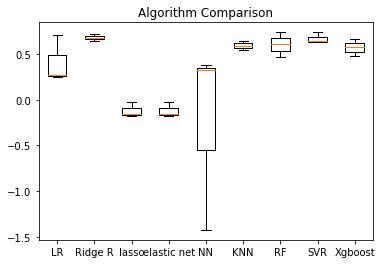

In [ ]:
# ML models to test
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge R',Ridge()))
models.append(('lasso',linear_model.Lasso()))
models.append(('elastic net',ElasticNet()))
#models.append(('GP',GaussianProcessRegressor())) (very poor)
models.append(('NN', MLPRegressor(solver = 'lbfgs')))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 1000))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
models.append(('Xgboost',XGBRegressor(objective='reg:squarederror', n_estimators=1000)))
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
  tscv = TimeSeriesSplit(n_splits=3)
    #n_splits=3 : because in train data there are 3 steps of prediction
    #1-2016 features -->predict 2017; 2-16,17-->predict 18; 3-16,17,18-->predict 19
  cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


# performance ranking according to the plot 
1-Ridge,2-SVR, 3-KNN, 4-Xgboost,5-RF

# Ridge

In [ ]:
model = Ridge()
param_search = { 
    'alpha': [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'solver': ['auto','svd','cholesky','lsqr','sparse_cg','sag','saga']

}
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_

In [ ]:
best_model

Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)

In [ ]:
best_score

0.6818773152122893

In [ ]:
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
#overall performance
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 11629.871015754736
MAE is : 80.28945397179918
RMSE is : 107.84187969316343
MAPE is : 7.749510897502336 %
R2 is : 0.7133851177699264

SMAPE is : 0.019090574673359898

MASE is : 0.9332997838674789


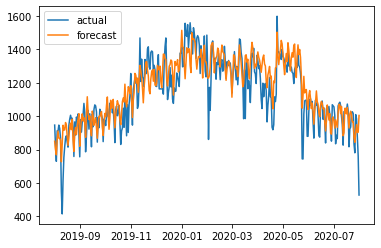

In [ ]:
# plot real vs predictions
time=data.index[-365:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

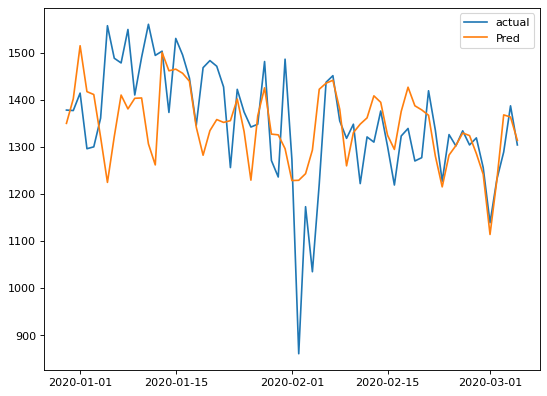

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[150:217],inv_y[150:217],label='actual')
plt.plot(time[150:217],inv_yhat[150:217],label='Pred')
plt.legend()
plt.show()

ZOOM on Ramadan 2020

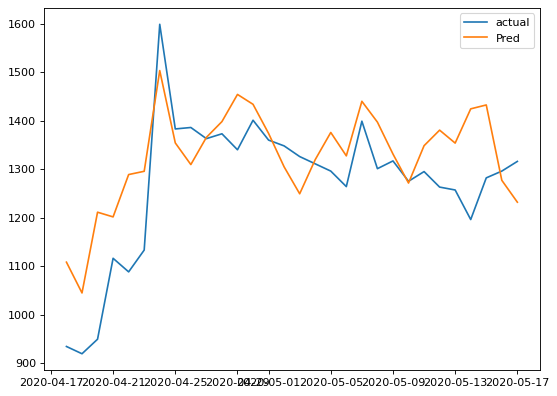

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[260:290],inv_y[260:290],label='actual')
plt.plot(time[260:290],inv_yhat[260:290],label='Pred')
plt.legend()
plt.show()

**peak period**

In [ ]:
# (3 winter months + ramadan month)* 5.5 year=4months*5.5years=22 months=22*30=660 days
#we see the dates corresponding to top 660 peak demands

peak_time=df.sort_values(by='max_pdl_daily_load_t',ascending=False)[['time']].time[:660]
peak_time

376    2017-01-11
381    2017-01-16
1134   2019-02-08
377    2017-01-12
1575   2020-04-24
          ...    
437    2017-03-13
57     2016-02-27
1179   2019-03-25
75     2016-03-16
894    2018-06-13
Name: time, Length: 660, dtype: datetime64[ns]

In [ ]:
#extract months of peaks
peak_months = [t.month for t in list(peak_time)]
unique=np.unique(np.array(peak_months))
#the % appearence of every peak month
d={}
for i in unique:
  d[i]=str(peak_months.count(i)/len(peak_months)*100)+' %'
  print(str(i)+':'       +str(d[i]))


1:21.666666666666668 %
2:18.636363636363637 %
3:16.969696969696972 %
4:6.969696969696971 %
5:10.454545454545453 %
6:2.878787878787879 %
11:6.8181818181818175 %
12:15.606060606060607 %


In [ ]:
#winter%
print('winter %  '+str(15.60+21.66+18.63+16.96))
#winter peak numbers
print(str(int((15.60+21.66+18.63+16.96)*0.01*660))+' / 660 days')

winter %  72.85
480 / 660 days


In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[4*30+1:8*30+3], inv_yhat[4*30+1:8*30+3])

Evaluation metric results:-
MSE is : 12466.978570600852
MAE is : 82.3646519140374
RMSE is : 111.6556248945876
MAPE is : 6.627028954410909 %
R2 is : 0.2609993438968299

SMAPE is : 0.05150443948164088

MASE is : 0.8867436299668702


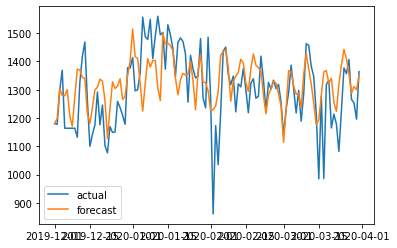

In [ ]:
# plot baseline and predictions
time=data.index[-365:][4*30+1:8*30+3]
plt.plot(time,inv_y[4*30+1:8*30+3],label='actual')
plt.plot(time,inv_yhat[4*30+1:8*30+3],label='forecast')
plt.legend()
plt.show()

# **same methodology is repeated**

# SVR

In [ ]:
X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]

In [ ]:

model = SVR()
param_search = { 
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1,2,3],
    'gamma' : ['scale','auto'],
    'C' : [0.5,1,1.5,2,2.5,3],
    'epsilon':[0.05,0.1,0.15],
    'shrinking':[True,False]
}
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)


SVR(C=2, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 10605.55625381791
MAE is : 76.12185416705232
RMSE is : 102.98328142867612
MAPE is : 7.273713312228796 %
R2 is : 0.7386290653993831

SMAPE is : 0.018254916895230074

MASE is : 0.8848548162583758


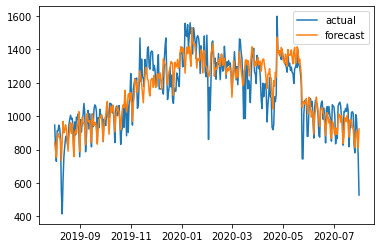

In [ ]:
# plot real vs predictions
time=data.index[-365:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

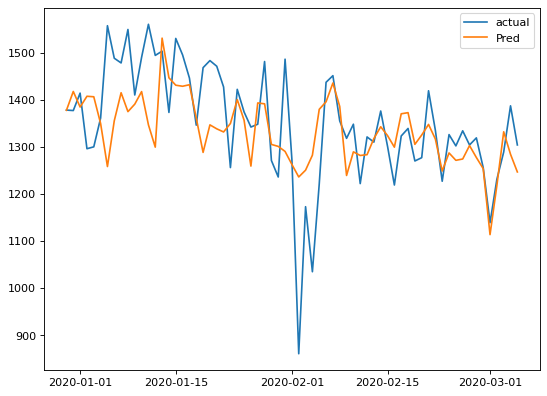

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[150:217],inv_y[150:217],label='actual')
plt.plot(time[150:217],inv_yhat[150:217],label='Pred')
plt.legend()
plt.show()

ZOOM on Ramadan 2020

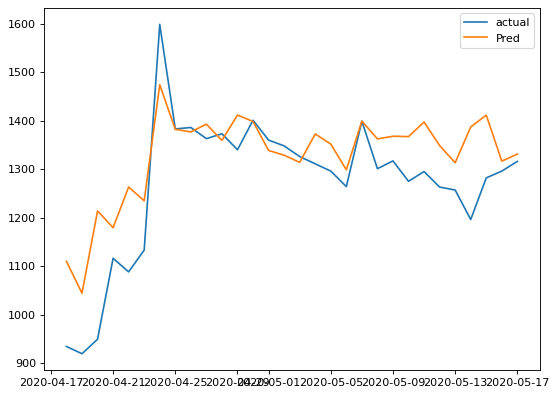

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[260:290],inv_y[260:290],label='actual')
plt.plot(time[260:290],inv_yhat[260:290],label='Pred')
plt.legend()
#plt.savefig('xgboost_test')
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[4*30+1:8*30+3], inv_yhat[4*30+1:8*30+3])

Evaluation metric results:-
MSE is : 11455.795181387035
MAE is : 79.950515477181
RMSE is : 107.03174847393196
MAPE is : 6.408638281475685 %
R2 is : 0.3209389021336435

SMAPE is : 0.05023588057827983

MASE is : 0.8607528674552096


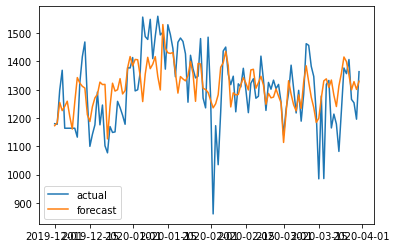

In [ ]:
# plot baseline and predictions
time=data.index[-365:][4*30+1:8*30+3]
plt.plot(time,inv_y[4*30+1:8*30+3],label='actual')
plt.plot(time,inv_yhat[4*30+1:8*30+3],label='forecast')
plt.legend()
plt.show()

# KNN

In [ ]:
X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]

In [ ]:

model = KNeighborsRegressor()
param_search = { 
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':[10,20,30],
    'p':[1,2]
}
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=10, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                    weights='distance')

In [ ]:
# make a prediction
yhat = best_model.predict(X_test)
yhat=yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
# invert scaling for forecast
#inv_yhat = concatenate((test_X[:, :-1],yhat), axis=1)
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,-1]
# invert scaling for actual
y_test = y_test.reshape((len(y_test), 1))
#inv_y = concatenate((test_X[:, :-1],test_y), axis=1)
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]

In [ ]:
timeseries_evaluation_metrics_func(inv_y, inv_yhat)

Evaluation metric results:-
MSE is : 14177.889139938667
MAE is : 92.24640023716249
RMSE is : 119.07094162699255
MAPE is : 8.826275361220201 %
R2 is : 0.6505899316845649

SMAPE is : 0.02236129188744598

MASE is : 1.0722895865518798


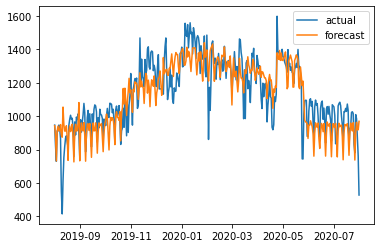

In [ ]:
# plot real vs predictions
time=data.index[-365:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,inv_yhat,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

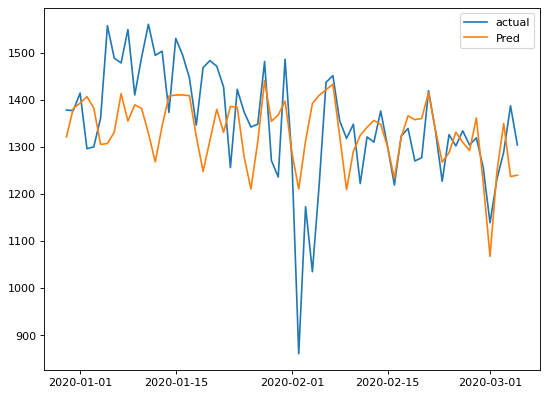

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[150:217],inv_y[150:217],label='actual')
plt.plot(time[150:217],inv_yhat[150:217],label='Pred')
plt.legend()
plt.show()

ZOOM on Ramadan 2020

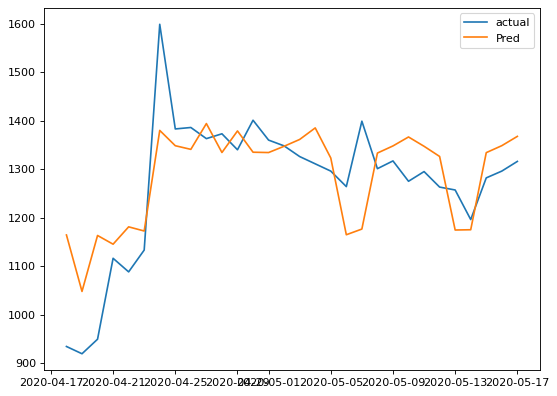

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[260:290],inv_y[260:290],label='actual')
plt.plot(time[260:290],inv_yhat[260:290],label='Pred')
plt.legend()
#plt.savefig('xgboost_test')
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[4*30+1:8*30+3], inv_yhat[4*30+1:8*30+3])

Evaluation metric results:-
MSE is : 14122.579202371118
MAE is : 93.60758044470097
RMSE is : 118.83845843148218
MAPE is : 7.466143899285976 %
R2 is : 0.1628608938951399

SMAPE is : 0.05902672733969893

MASE is : 1.00778578852712


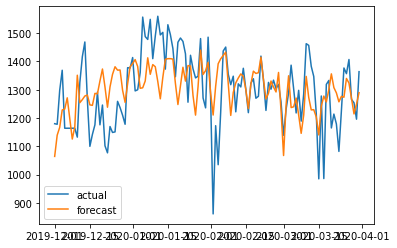

In [ ]:
# plot baseline and predictions
time=data.index[-365:][4*30+1:8*30+3]
plt.plot(time,inv_y[4*30+1:8*30+3],label='actual')
plt.plot(time,inv_yhat[4*30+1:8*30+3],label='forecast')
plt.legend()
plt.show()

# random forest and Xgboost do not require data scaling https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6

# Random forest

In [ ]:
#train data: all the data except the last 365 days
#test data: the last 365 days

X_train,y_train=data[:-365].drop(['max_pdl_daily_load_t'], axis = 1),data[:-365].max_pdl_daily_load_t
X_test,y_test=data[-365:].drop(['max_pdl_daily_load_t'], axis = 1),data[-365:].max_pdl_daily_load_t

In [ ]:
#fine tuning, grid search
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
param_search = { 
    'n_estimators': [10,20,30,40,50],#[10,20,30],#[10,50,100],#,
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,20,30,40,50],#[60,62,65,67,69],#[11,12,13],#[10,12,14,16,18,20],
    #'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1,2,3,4,5],#[5],#[4,5,6],[1, 2, 3,4],
    'bootstrap' : [True, False]
    #default_criterion for evaluation: mse
}
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
timeseries_evaluation_metrics_func(y_true, y_pred)


Evaluation metric results:-
MSE is : 16547.710327085453
MAE is : 100.02192348069738
RMSE is : 128.6379039283735
MAPE is : 9.42913686414478 %
R2 is : 0.5921863587179965

SMAPE is : 0.023875891724189576

MASE is : 1.1626737379398886


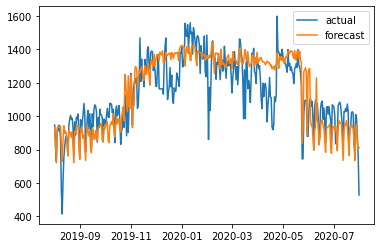

In [ ]:
# plot real vs predictions
time=data.index[-365:]
plt.plot(time,y_true,label='actual')
plt.plot(time,y_pred,label='forecast')


plt.legend()

plt.show()

ZOOM on winter 2020

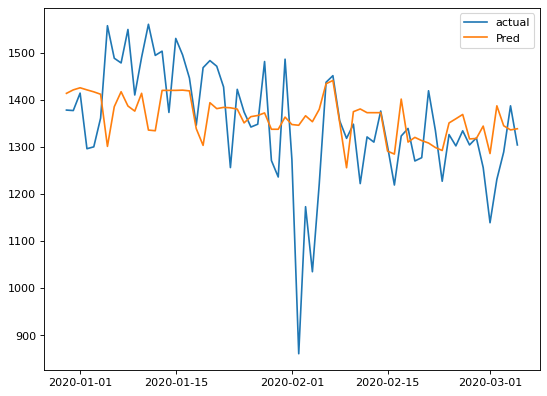

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[150:217],y_true[150:217],label='actual')
plt.plot(time[150:217],y_pred[150:217],label='Pred')
plt.legend()
plt.show()

ZOOM on Ramadan 2020

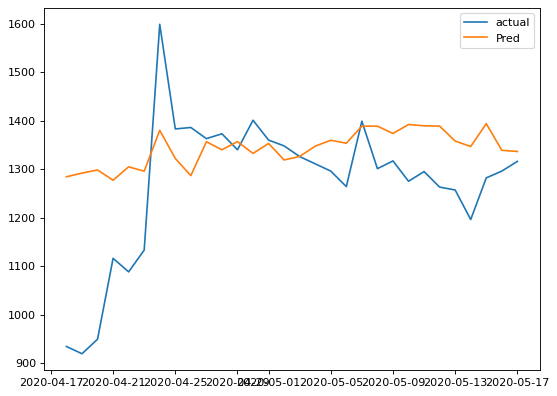

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[260:290],y_true[260:290],label='actual')
plt.plot(time[260:290],y_pred[260:290],label='Pred')
plt.legend()
#plt.savefig('xgboost_test')
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(y_true[4*30+1:8*30+3], y_pred[4*30+1:8*30+3])

Evaluation metric results:-
MSE is : 19341.42114849106
MAE is : 106.67277595093122
RMSE is : 139.0734379689057
MAPE is : 8.832724121081116 %
R2 is : -0.14649454458906286

SMAPE is : 0.06579537159495515

MASE is : 1.1484466013903014


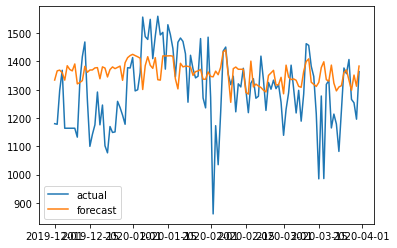

In [ ]:
# plot baseline and predictions
time=data.index[-365:][4*30+1:8*30+3]
plt.plot(time,y_true[4*30+1:8*30+3],label='actual')
plt.plot(time,y_pred[4*30+1:8*30+3],label='forecast')
plt.legend()
plt.show()

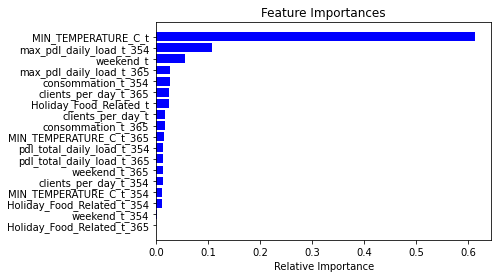

In [ ]:
imp = best_model.feature_importances_
features = X_train.columns
indices = np.argsort(imp)
plt.title('Feature Importances')
plt.barh(range(len(indices)), imp[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# xgboost

In [ ]:
#train data: all the data except the last 365 days
#test data: the last 365 days

X_train,y_train=data[:-365].drop(['max_pdl_daily_load_t'], axis = 1),data[:-365].max_pdl_daily_load_t
X_test,y_test=data[-365:].drop(['max_pdl_daily_load_t'], axis = 1),data[-365:].max_pdl_daily_load_t

In [ ]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()
param_search = { 
    'n_estimators': [100,200,300,400],#[10,20,30],#[10,50,100],#,
    'max_depth' : [10,20,30,40,50],#[60,62,65,67,69],#[11,12,13],#[10,12,14,16,18,20],
    'booster' : ['gbtree', 'gblinear', 'dart'],
    'learning_rate':[0.001,0.01,0.1]
}
tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv, param_grid=param_search, scoring = 'r2')#we 
#can define another metric as mentioned in the tuto
gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
best_model.fit(X_train,y_train)


[22:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=400,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_true = y_test.values
y_pred = best_model.predict(X_test)
timeseries_evaluation_metrics_func(y_true, y_pred)


Evaluation metric results:-
MSE is : 15102.033382179894
MAE is : 96.9030985281892
RMSE is : 122.89033071067834
MAPE is : 9.193138514628156 %
R2 is : 0.6278146581845621

SMAPE is : 0.023165309717475584

MASE is : 1.1264199273819195


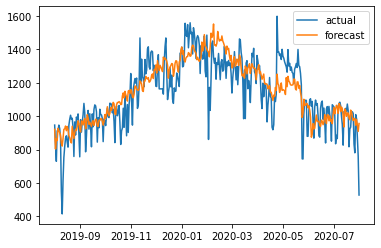

In [ ]:
# plot baseline and predictions
time=data.index[-365:]
plt.plot(time,y_true,label='actual')
plt.plot(time,y_pred,label='forecast')


plt.legend()

#locator = mdates.MonthLocator()
#fmt = mdates.DateFormatter('%b')
#X = plt.gca().xaxis
#X.set_major_locator(locator)
# Specify formatter
#X.set_major_formatter(fmt)
plt.show()

ZOOM on winter 2020

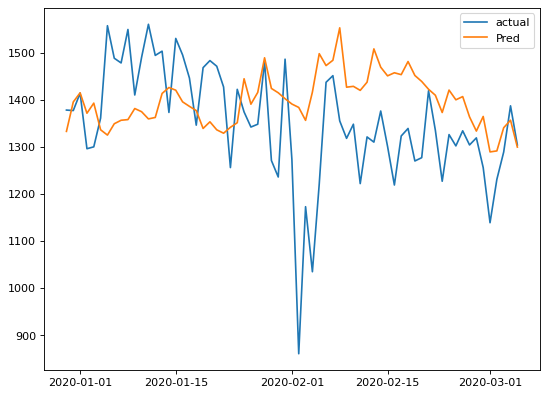

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[150:217],y_true[150:217],label='actual')
plt.plot(time[150:217],y_pred[150:217],label='Pred')
plt.legend()
#plt.savefig('xgboost_test')
plt.show()

ZOOM on Ramadan 2020

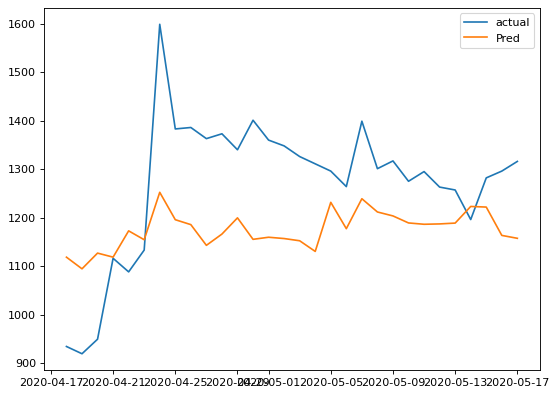

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.plot(time[260:290],y_true[260:290],label='actual')
plt.plot(time[260:290],y_pred[260:290],label='Pred')
plt.legend()
#plt.savefig('xgboost_test')
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(y_true[4*30+1:8*30+3], y_pred[4*30+1:8*30+3])

Evaluation metric results:-
MSE is : 17742.47356146449
MAE is : 108.44143811552254
RMSE is : 133.20087672933872
MAPE is : 8.788699510185957 %
R2 is : -0.05171429697769092

SMAPE is : 0.06707629539095031

MASE is : 1.1674881425316594


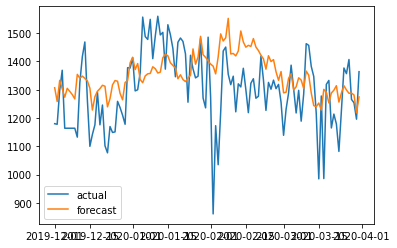

In [ ]:
# plot baseline and predictions
time=data.index[-365:][4*30+1:8*30+3]
plt.plot(time,y_true[4*30+1:8*30+3],label='actual')
plt.plot(time,y_pred[4*30+1:8*30+3],label='forecast')
plt.legend()
plt.show()

# ensembling



*   Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='lsqr', tol=0.001)
*   SVR(C=2, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
* KNeighborsRegressor(algorithm='auto', leaf_size=10, metric='minkowski',metric_params=None, n_jobs=None, n_neighbors=9, p=1,weights='distance')



In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

In [ ]:
features=data_scaled[:,:-1]
target=data_scaled[:,-1]

In [ ]:
# split into train and test sets

n_train_days = -365

X_train,y_train = features[:n_train_days, :],target[:n_train_days]
X_test, y_test = features[n_train_days:, :],target[n_train_days:]



In [ ]:
# get a list of base models
def get_models():
  models = list()
  models.append(('ridge', Ridge(alpha=0.8, copy_X=True, fit_intercept=True, max_iter=None, 
                                normalize=False, random_state=None, solver='lsqr', tol=0.001)))
  models.append(('svr', SVR(C=2, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma='auto', 
                            kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)))

  models.append(('knn', KNeighborsRegressor(algorithm='auto', leaf_size=10, metric='minkowski',
                                            metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                                            weights='distance')))
  return models


In [ ]:
def evaluate_models(models, X_train, X_test, y_train, y_test):
  scores = list()
  for name, model in models:
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    yhat=yhat.reshape(yhat.shape[0],1)
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
    inv_yhat = concatenate((X_test,yhat), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,-1]
    y_test = y_test.reshape((len(y_test), 1))
    inv_y = concatenate((X_test,y_test), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,-1]
    mae = mean_absolute_error(inv_y, inv_yhat)
    scores.append(-mae)
  return scores


In [ ]:
# create the base models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
print(scores)
ranking = 1 + argsort(argsort(scores))
print(ranking)

[-80.28945397179918, -76.12185416705232, -92.24640023716249]
[2 3 1]


In [ ]:
# create the ensemble
weighted_ensemble = VotingRegressor(estimators=models, weights=ranking)
#verbose --> time consumed while fitting will be printed
# fit the ensemble on the training dataset
weighted_ensemble.fit(X_train, y_train)
# make predictions on test set
weighted_yhat = weighted_ensemble.predict(X_test)
yhat=weighted_yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
weighted_inv_yhat = inv_yhat[:,-1]

y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
# evaluate predictions using MAE (Mean absolute error)
score = mean_absolute_error(inv_y, weighted_inv_yhat)
print('Weighted Avg MAE: %.3f' % (score))
# evaluate each standalone model
scores = evaluate_models(models, X_train, X_test, y_train, y_test)
for i in range(len(models)):
	print('>%s: %.3f' % (models[i][0], -scores[i]))



Weighted Avg MAE: 75.461
>ridge: 80.289
>svr: 76.122
>knn: 92.246


In [ ]:
# evaluate equal weighting (simple average ensemble)
average_ensemble = VotingRegressor(estimators=models)
average_ensemble.fit(X_train, y_train)
average_yhat = average_ensemble.predict(X_test)

yhat=average_yhat.reshape(yhat.shape[0],1)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]))
inv_yhat = concatenate((X_test,yhat), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
simple_inv_yhat = inv_yhat[:,-1]

y_test = y_test.reshape((len(y_test), 1))
inv_y = concatenate((X_test,y_test), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,-1]
score = mean_absolute_error(inv_y, simple_inv_yhat)
print('Voting MAE: %.3f' % (score))

Voting MAE: 75.617


# **weighted ensembling**




In [ ]:
#general model performance 
timeseries_evaluation_metrics_func(inv_y, weighted_inv_yhat)

Evaluation metric results:-
MSE is : 10615.383594316696
MAE is : 75.46117953807088
RMSE is : 103.03098366179319
MAPE is : 7.253519386859188 %
R2 is : 0.738386873371984

SMAPE is : 0.018077055350821852

MASE is : 0.8771750095349216


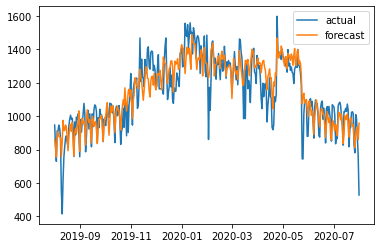

In [ ]:
# plot baseline and predictions
time=data.index[-365:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,weighted_inv_yhat,label='forecast')
plt.legend()
plt.show()

**peak period**

In [ ]:
#model performance in peak period (winter)
timeseries_evaluation_metrics_func(inv_y[4*30+1:8*30+3], weighted_inv_yhat[4*30+1:8*30+3])

Evaluation metric results:-
MSE is : 11615.560648029252
MAE is : 79.93356102507
RMSE is : 107.77551042806178
MAPE is : 6.423885049872803 %
R2 is : 0.3114685413720033

SMAPE is : 0.05017428269944148

MASE is : 0.8605703346324559


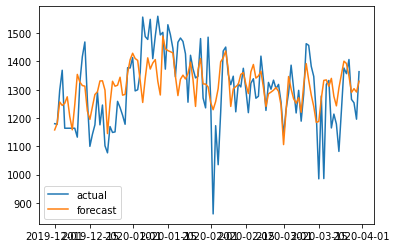

In [ ]:
# plot baseline and predictions
time=data.index[-365:][4*30+1:8*30+3]
plt.plot(time,inv_y[4*30+1:8*30+3],label='actual')
plt.plot(time,weighted_inv_yhat[4*30+1:8*30+3],label='forecast')
plt.legend()
plt.show()

# **simple average ensembling**

In [ ]:
timeseries_evaluation_metrics_func(inv_y, simple_inv_yhat)

Evaluation metric results:-
MSE is : 10789.333026250804
MAE is : 75.61668496543989
RMSE is : 103.8717142741507
MAPE is : 7.270461094145377 %
R2 is : 0.7340999388152514

SMAPE is : 0.018146668383985123

MASE is : 0.8789826340058101


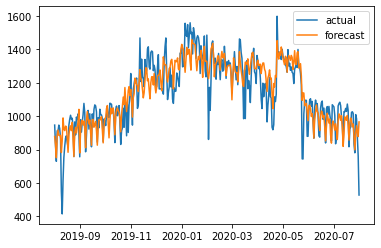

In [ ]:
# plot baseline and predictions
time=data.index[-365:]
plt.plot(time,inv_y,label='actual')
plt.plot(time,simple_inv_yhat,label='forecast')
plt.legend()
plt.show()

In [ ]:
timeseries_evaluation_metrics_func(inv_y[4*30+1:8*30+3], simple_inv_yhat[4*30+1:8*30+3])

Evaluation metric results:-
MSE is : 11835.209195308482
MAE is : 80.82928134231615
RMSE is : 108.7897476571597
MAPE is : 6.4933080544039425 %
R2 is : 0.29844851253083426

SMAPE is : 0.05076654123382997

MASE is : 0.8702137225068913


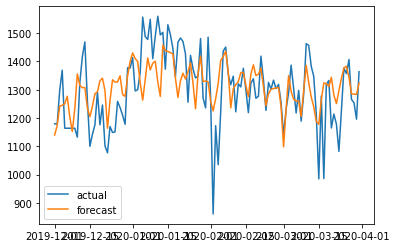

In [ ]:
# plot baseline and predictions
time=data.index[-365:][4*30+1:8*30+3]
plt.plot(time,inv_y[4*30+1:8*30+3],label='actual')
plt.plot(time,simple_inv_yhat[4*30+1:8*30+3],label='forecast')
plt.legend()
plt.show()